In [42]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [43]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [44]:
X_train.shape


(60000, 28, 28)

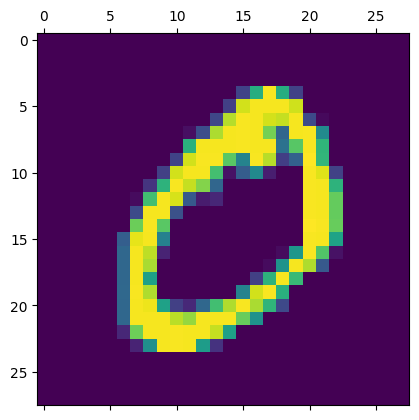

In [45]:
plt.matshow(X_train[1])

In [46]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [47]:
X_test_flattened.shape

(10000, 784)

In [50]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 256us/step - accuracy: 0.8360 - loss: 10.5243
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.8794 - loss: 5.9844
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 265us/step - accuracy: 0.8825 - loss: 5.7814
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.8841 - loss: 5.6471
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 265us/step - accuracy: 0.8879 - loss: 5.2971


In [51]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.8983 - loss: 5.4815


[5.48148250579834, 0.8982999920845032]

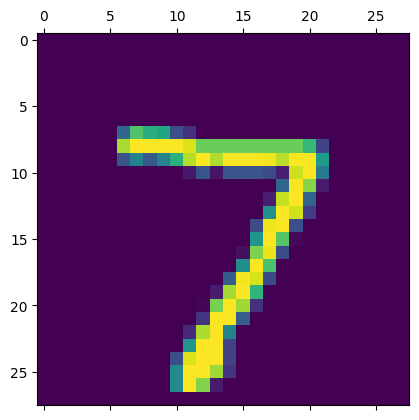

In [53]:
plt.matshow(X_test[0])

In [57]:
y_predicted= model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step


array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.0006077e-32,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 2.0658020e-35], dtype=float32)

In [60]:
print(np.argmax(y_predicted[0]))

7


In [62]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [63]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    3,    0,    4,    4,    1,    1,    0],
       [   0, 1086,   14,    0,    0,    3,    5,    1,   26,    0],
       [  12,    6,  954,    8,    6,    4,    9,    7,   22,    4],
       [   7,    1,   57,  831,    2,   55,    3,   10,   37,    7],
       [   8,    2,   13,    2,  881,    1,   14,    7,   16,   38],
       [  23,    3,   10,   27,    7,  763,   13,    4,   38,    4],
       [  23,    2,   16,    1,    4,   21,  885,    0,    6,    0],
       [   3,    6,   34,    3,    6,    2,    1,  936,    9,   28],
       [  12,    8,   23,   11,    7,   46,   15,   12,  834,    6],
       [  11,    5,    2,    7,   56,   11,    0,   54,   17,  846]],
      dtype=int32)>

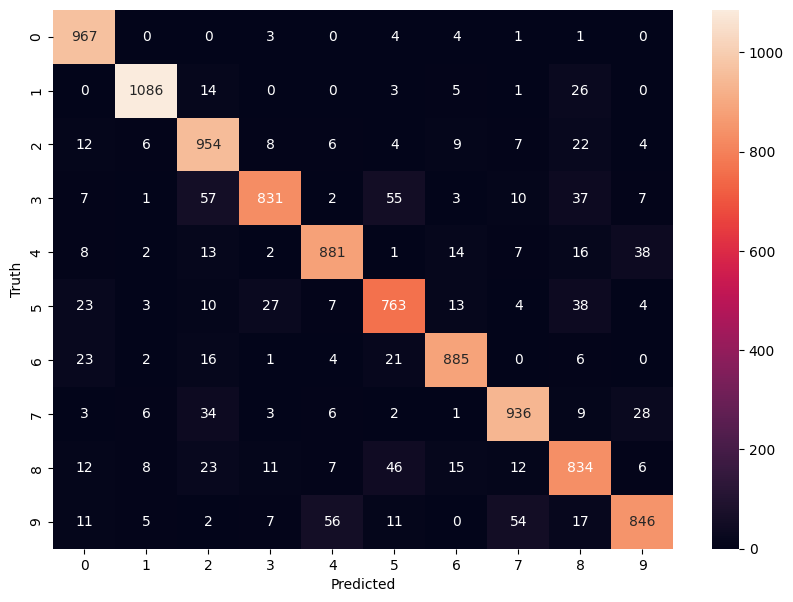

In [64]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [65]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5) 

Epoch 1/5


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - accuracy: 0.8481 - loss: 2.7673
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - accuracy: 0.8980 - loss: 0.4209
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - accuracy: 0.9206 - loss: 0.3109
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - accuracy: 0.9329 - loss: 0.2615
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - accuracy: 0.9375 - loss: 0.2432


In [66]:
model.evaluate(X_test_flattened,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.9336 - loss: 0.2943


[0.2943311631679535, 0.9336000084877014]

In [69]:
y_predicted= model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step


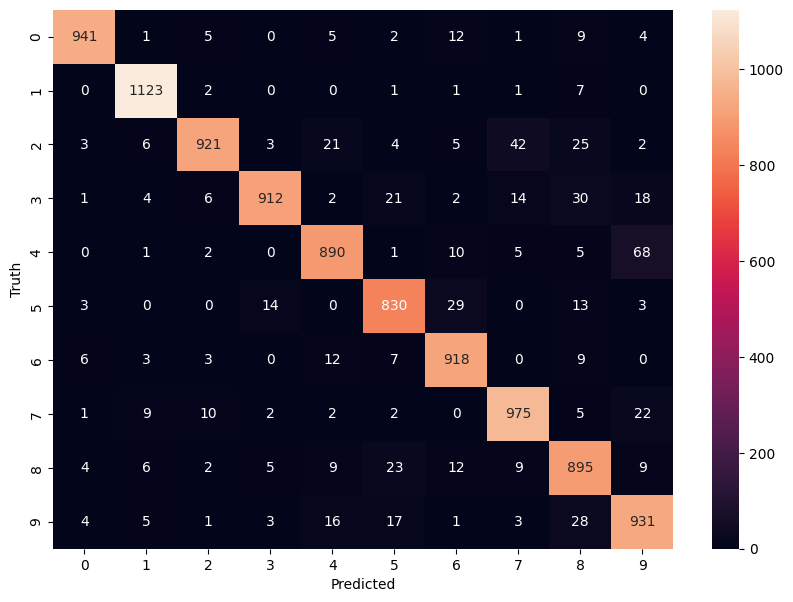

In [70]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()